In [180]:
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import torch
from torch_geometric.data import Data

import random

In [48]:
def encodeAdj(genome):
    l = len(genome)
    adjacency = np.zeros(l*2 + 2, dtype=np.int32)
    adjacency[0] = -1

    for i in range(l):
        genin = genome[i] * 2
        if genome[i] > 0:
            adjacency[i*2 + 1] = genin - 2
            adjacency[i*2 + 2] = genin - 1
        else:
            adjacency[i*2 + 1] = -genin - 1
            adjacency[i*2 + 2] = -genin - 2

    adjacency[l * 2 + 1] = -1
    if l>= 2 and genome[0] == genome[-1]:
        # cicle
        return np.delete(adjacency, -2)
    return adjacency

In [3]:
def curve_line(p1, p2):
    if p1 == p2:
        return (p1, p1)
    if p2 < p1:
        p1, p2 = p2, p1
    x = np.linspace(p1, p2, 100 * (p2 - p1))
    wid = p2 - p1 + 2
    rad = (x - p1 + 1)/wid * np.pi
    y = (np.sin(rad) - np.sin(1/wid * np.pi))/(1 - np.sin(1/wid * np.pi))
    return (x, np.absolute(y))

In [4]:
def draw_curve(adjList, color = 'k', scale = 1):
    size = adjList.size//2 - 1
    for t in np.arange(size*2 - 1) + 1:
        p1, p2 = adjList[t], adjList[t + 1]
        if np.abs(p1-p2) == 1:
            s = 0.1 * scale
        else:
            s = 1 * scale
        x, y = curve_line(p1, p2)
        if t%2 == 0:
            plt.plot(x, y * s, color = color)        
        else:
            plt.plot(x, y * s, color = 'k')        

In [5]:
def draw_base(size):
    points = np.arange(size * 2) + 1
    for p in points:
        plt.plot(p, 0, 'o')
    for t in np.arange(size*2 - 1) + 1:
        if t%2 == 0:
            color = 'c'        
        else:
            color = 'k'
        plt.plot([t, t + 1], [0, 0], 'o', linestyle='-.', color = color)

gnome1, gnome2, gnome3

In [6]:
g1 = [1,2,3,4,5,6,7,8,-180,60,-155,-154,-153,-152,190,191,192,193,-110,-109,-108,-99,-98,-97,-96,
     85,86,87,88,89,90,91,92,93,94,95,-84,-131,-130,-129,-128,-157,-156,61,62,63,-53,-52,32,33,34,
     177,178,-137,-136,-135,-134,-133,-132,-83,-82,-81,-80,-79,-78,-102,-164,-163,-40,103,104,-199,
     -198,-197,-196,-195,-194,111,112,179,-183,-45,-118,-51,-50,-49,-48,-47,-46,101,-175,-174,165,
     166,167,168,169,170,171,172,173,176,35,-127,-126,-125,-124,-123,-122,-121,-120,-119,-44,-43,
     -42,25,26,27,140,141,142,143,144,145,146,147,148,-21,-20,-19,-139,-138,113,114,115,116,117,-31,
     -30,158,159,160,161,162,41,-24,-23,-22,149,150,151,-189,-188,75,76,77,-39,-38,-37,-36,-29,-28,-18,
     -17,-16,-15,-14,-13,-12,-11,-10,185,186,187,-74,-73,-72,-71,-70,-69,-68,-67,-66,-65,-64,54,55,56,57,
     58,59,184,-9,181,182,-100,-107,-106,-105,200];
g2 = [1,2,3,4,88,-161,-160,-159,-158,-157,-156,-155,-154,-153,-152,190,178,113,114,87,5,6,7,8,9,10,11,12,13,
      14,15,16,17,168,169,170,171,79,80,81,82,83,84,85,86,115,116,-90,-89,162,163,164,-173,-172,-78,-77,109,
      110,-193,-192,-191,-177,53,54,55,56,-24,-23,-22,149,150,151,-189,-188,75,76,-108,-107,-106,21,-148,-147,
      -146,-179,-112,-111,194,195,196,197,198,199,-39,-38,-37,-36,-35,-176,102,103,104,-121,28,29,-18,-167,-166,
      -165,174,175,-101,46,47,48,49,120,30,31,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,
      139,140,141,142,143,144,145,-183,-182,-181,-180,184,-25,42,43,44,45,-100,-99,-98,-97,95,96,-94,-93,-92,
      -91,117,118,119,50,51,52,-34,-33,-32,-122,105,-20,-19,-27,-26,185,186,187,-74,-73,-72,-71,-70,-69,-68,-67,
      -66,-65,-64,-63,-62,-61,-60,-59,-58,-57,-41,-40,200];
g3 = [1,2,-23,-22,149,150,-21,-20,-19,-67,-66,-65,-64,199,-39,-38,-37,-36,-35,-176,102,103,104,-121,-29,-110,
      -109,77,78,148,-187,-186,-185,26,27,68,69,70,71,72,73,74,151,12,13,14,15,177,178,113,114,115,116,-90,
      -89,162,163,164,193,-28,-18,91,92,93,40,41,-24,3,4,88,-161,-160,-159,-158,-157,-156,-155,-154,-153,
      -152,190,191,192,-173,-172,9,10,-179,-112,-111,194,195,196,32,33,34,87,5,6,7,-129,-128,-127,-126,-125,
      -124,-123,-31,-30,-120,-49,-48,-60,-59,-58,-57,-56,-55,-54,-53,136,-141,-140,-139,-138,-137,61,166,167,117,
      118,119,50,51,52,-86,-85,-84,181,182,183,-17,-16,-135,63,-198,-197,-122,105,106,107,108,-76,-75,188,189,
      -11,146,147,-42,25,-184,180,-83,-82,-81,-80,-79,142,143,144,145,168,169,170,171,-8,130,131,132,-46,101,-175,
      -174,165,62,-134,133,47,43,44,45,-100,-99,-98,-97,95,96,-94,200];

In [7]:
A = encodeAdj(g1)
B = encodeAdj(g2)
C = encodeAdj(g3)

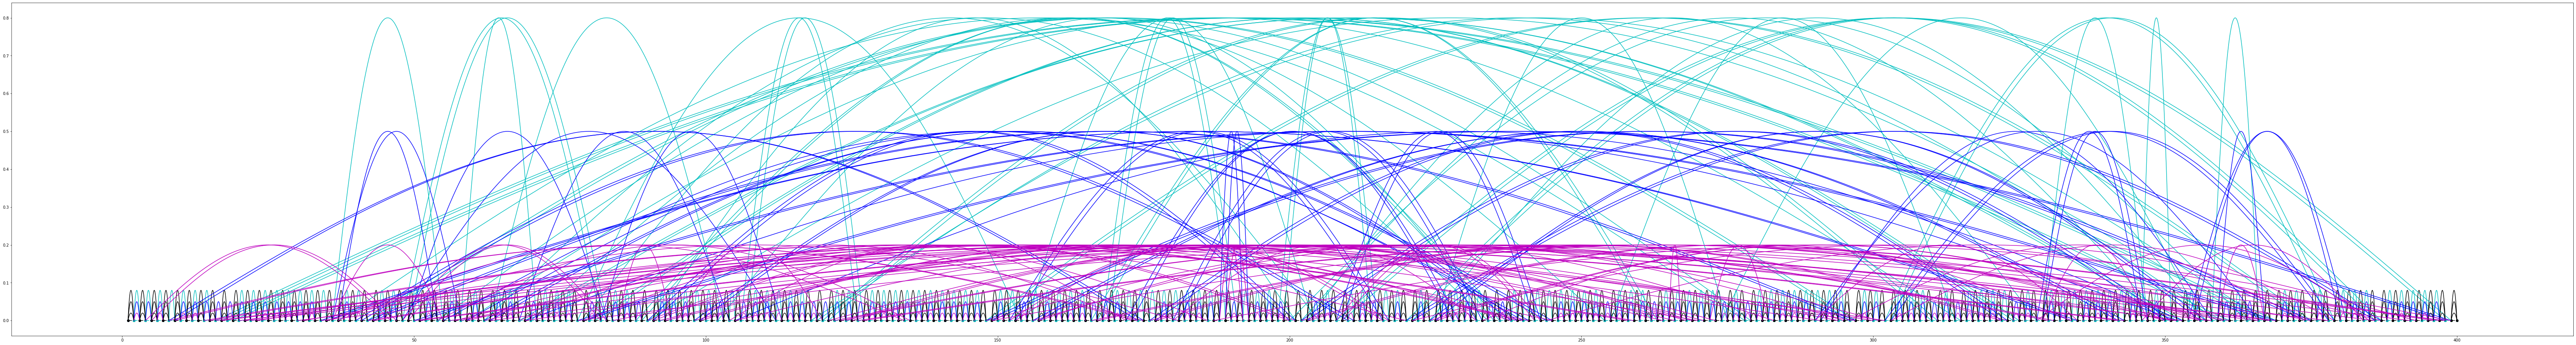

In [8]:
figure(figsize=(120, 16))

draw_base(A.size//2 - 1)
draw_curve(A, color = 'c', scale = 0.8)
draw_curve(B, color = 'b', scale = 0.5)
draw_curve(C, color = 'm', scale = 0.2)

In [15]:
def gen_graph(*genomes):
    graph_adj = np.empty((2,0), dtype = np.int32)
    max_node_index = []
    for genome in genomes:
        gene_adj = encodeAdj(genome)        
        graph_adj = np.concatenate(
            (graph_adj, np.stack((gene_adj[1:-2], gene_adj[2:-1]))), 
            axis = 1)
        max_node_index.append(gene_adj.max())
        
    node_num = max(max_node_index) + 1
    node_x = np.zeros((node_num, 2), dtype = np.int32)
    node_x[np.arange(node_num) % 2 == 0, 0] = 1
    node_x[np.arange(node_num) % 2 == 1, 1] = 1
    
    graph_data = Data(x = node_x, edge_index = torch.tensor(graph_adj), 
                      dtype = torch.long, num_nodes = node_num)
        
    return graph_data

In [91]:
res = gen_graph(g1, g2, g3)

In [92]:
res

Data(x=[400, 2], edge_index=[2, 1197], dtype=torch.int64, num_nodes=400)

In [18]:
import networkx as nx

from torch_geometric.utils.convert import to_networkx

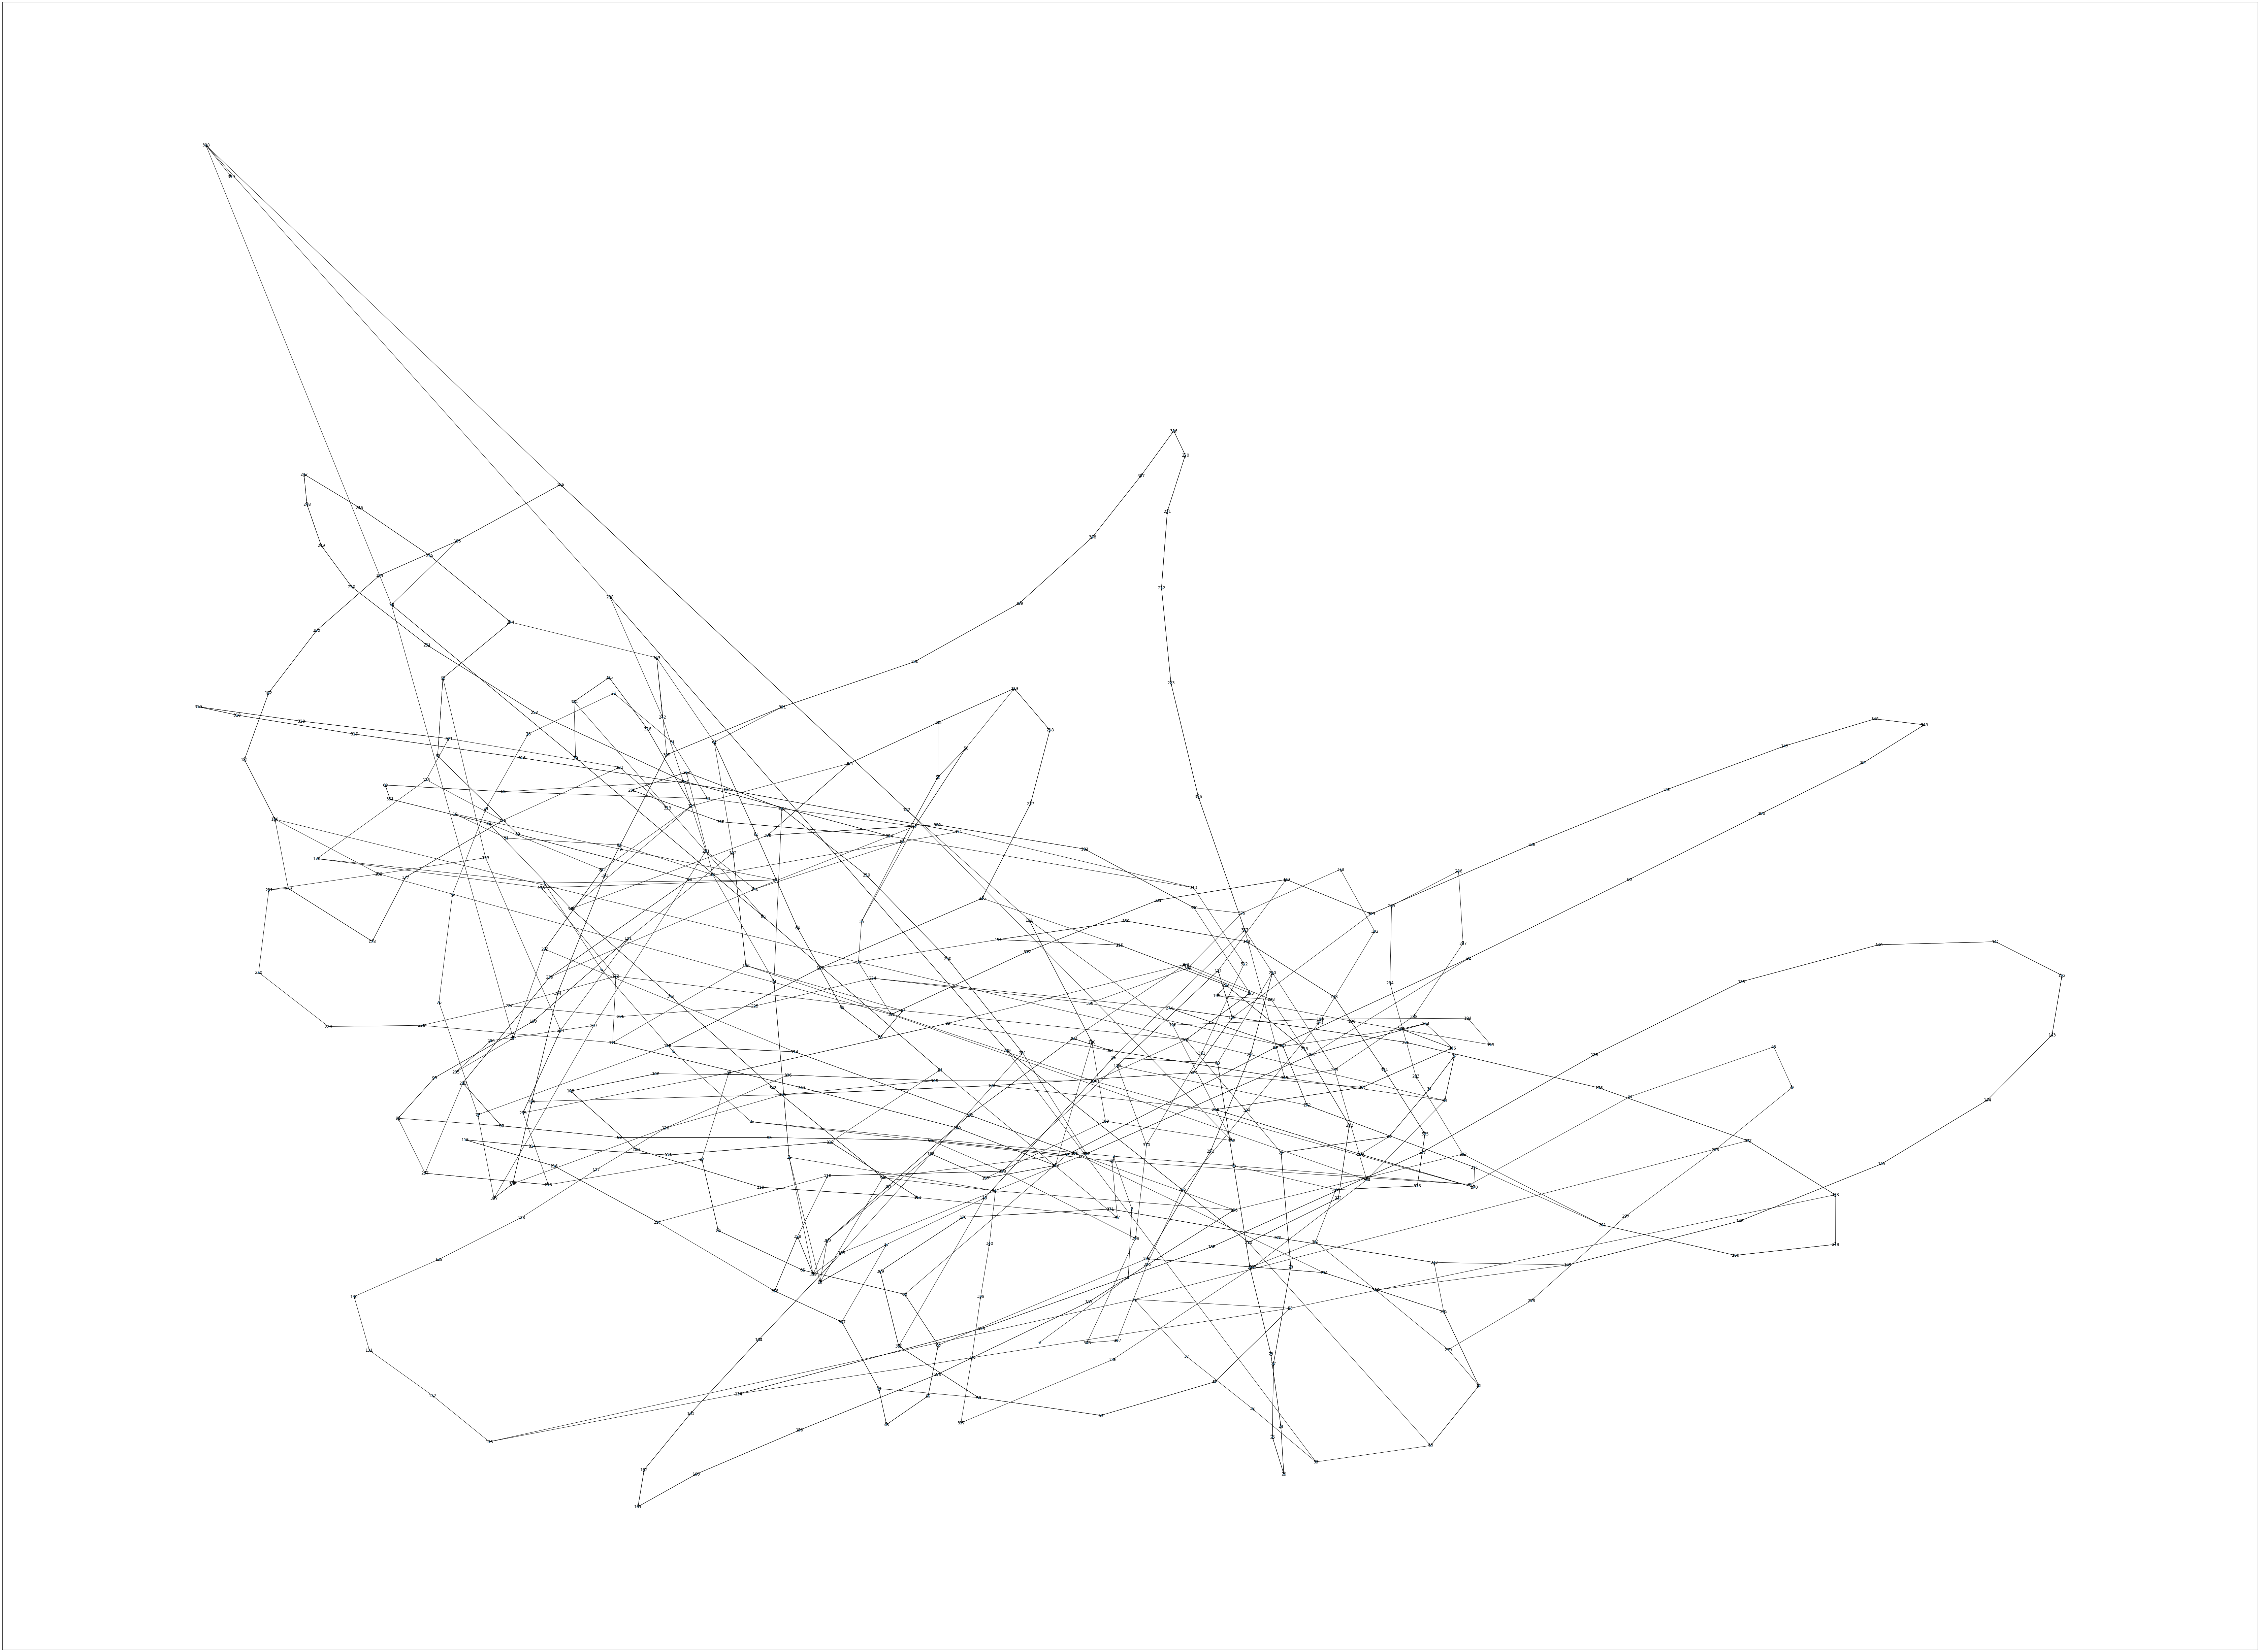

In [113]:
plot_network(res)

In [23]:
tmp = [1, 13, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1]
encodeAdj(tmp)

array([-1,  1,  2, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3, 24, 23,  1,
       -1], dtype=int32)

In [24]:
test = gen_graph(tmp)

In [25]:
test

Data(x=[37, 2], edge_index=[2, 32], dtype=torch.int64, num_nodes=37)

In [28]:
print(test.edge_index)

tensor([[ 1,  2, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 18, 17, 16, 15,
         14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3, 24, 23],
        [ 2, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 18, 17, 16, 15, 14,
         13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3, 24, 23,  1]],
       dtype=torch.int32)


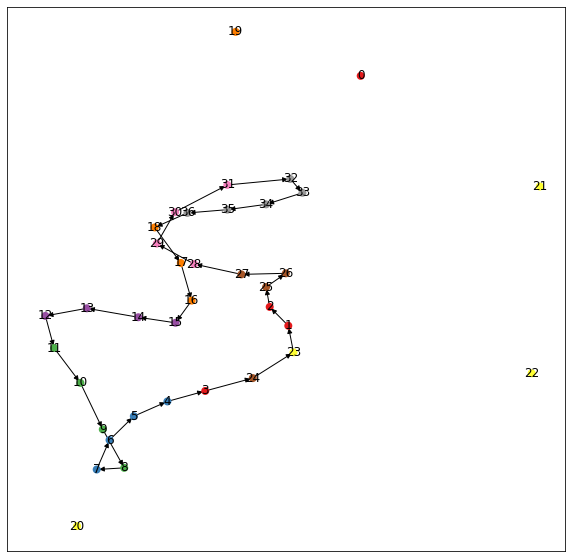

In [37]:
plot_network(test)

In [39]:
from genome_file import read_genome

In [84]:
test = read_genome()

In [59]:
for x in test:
    print(x)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
[[1, 13, 14, 15, 16, 17, 18, 19, 20], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 2]]
[[1, 13, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, -11, -10, 19, 20]]
[[-11, -10, 19, 20], [1, 13, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1]]
[[-11, -10, 19, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1, 13, 20]]
[[-11, -10, 19, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1, 13, 20]]
[[-11, -10, 19, 14, 15, 16, 17, 18, 7, 8, 9, -6, -5, -4, -3, -2, -12, 1, 13, 20]]
[[-11, -3, -2, -12, 1, 13, 20], [-10, 19, 14, 15, 16, 17, 18, 7, 8, 9, -6, -5, -4, -10]]
[[-11, -3, -2, -12, 1, 13, 20], [7, 8, 9, -6, -5, -4, -10, 19, 14, 15, 16, 17, 18]]
[[-11, -3, -4, -10, 19, 14, 15, 16, 17, 18], [7, 8, 9, -6, -5, -2, -12, 1, 13, 20]]
[[-11, -3, -4, -10, 19, 14, 15, 16, 17, 18], [7, 8, 9, 12, 2, 5, 6, 1, 13, 20]]
[[-11, -3, -4, -10, 19, 12, 2, 5, 6, 1, 13, 20], [7, 8, 9, 14, 15, 16, 17, 18]]
[[-

In [85]:
tmp = test[1]

In [86]:
tmp

[[1, 13, 14, 15, 16, 17, 18, 19, 20], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 2]]

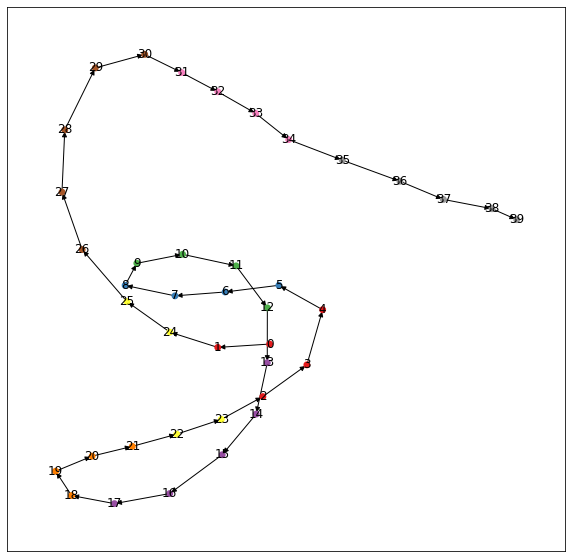

In [87]:
res = gen_graph(*tmp)
plot_network(res)

In [63]:
res

Data(x=[40, 2], edge_index=[2, 39], dtype=torch.int64, num_nodes=40)

In [65]:
res.edge_index

tensor([[ 0,  1, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,  2,
          3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
         21, 22, 23],
        [ 1, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  3,
          4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23,  2]], dtype=torch.int32)

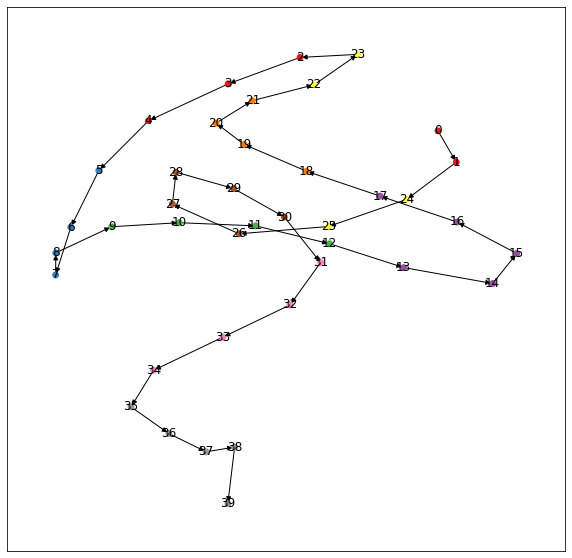

In [70]:
plot_network(res)

In [71]:
test_a = encodeAdj(tmp[0])
test_b = encodeAdj(tmp[1])

In [72]:
test_a

array([-1,  0,  1, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, -1], dtype=int32)

In [73]:
test_b

array([-1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  2, -1], dtype=int32)

In [171]:
def gen_single_graph(*genomes):
    graph_adj = np.empty((2,0), dtype = np.int32)
    max_node_index = []
    for genome in genomes:
        for gene in genome:
            gene_adj = encodeAdj(gene)        
            graph_adj = np.concatenate(
                (graph_adj, np.stack((gene_adj[1:-2], gene_adj[2:-1]))), 
                axis = 1)
            max_node_index.append(gene_adj.max())
        
    node_num = max(max_node_index) + 1
    node_x = np.zeros((node_num, 2), dtype = np.int32)
    node_x[np.arange(node_num) % 2 == 0, 0] = 1
    node_x[np.arange(node_num) % 2 == 1, 1] = 1
    
    graph_data = Data(x = node_x, edge_index = torch.tensor(graph_adj), 
                      dtype = torch.long, num_nodes = node_num)
        
    return graph_data

In [172]:
def gen_multi_graph(*genomes):
    graphs = []
    for genome in genomes:
        graph_data = gen_single_graph(genome)
        graphs.append(graph_data)
    return graphs

In [173]:
tmp = gen_multi_graph(test[1], test[2], test[3])

In [174]:
tmp

[Data(x=[40, 2], edge_index=[2, 39], dtype=torch.int64, num_nodes=40),
 Data(x=[40, 2], edge_index=[2, 39], dtype=torch.int64, num_nodes=40),
 Data(x=[40, 2], edge_index=[2, 39], dtype=torch.int64, num_nodes=40)]

In [177]:
def plot_single_network(data, figsize = (120, 90)):
    pgraph = to_networkx(data)
    node_labels = np.arange(len(data.x))
    
    plt.figure(figsize = figsize)

    pos = nx.spring_layout(pgraph)
    nx.draw_networkx_nodes(pgraph, pos=pos, 
                           cmap = plt.get_cmap('Set1'),
                           node_size = 80)
    nx.draw_networkx_labels(pgraph, pos=pos, font_size=10)
    arcs = nx.draw_networkx_edges(pgraph, pos=pos, 
                                  connectionstyle='arc3,rad=0.3',
                                  edge_cmap = plt.get_cmap('Set1'),
                                  width = 2)
    for arc in arcs:  # change alpha values of arcs
        arc.set_alpha(0.3)
    plt.show()

In [195]:
def plot_multi_graph(data, figsize = (120, 90)):
    pgraph = [to_networkx(d) for d in data]
    # node_labels = np.arange(len(data.x))
    
    plt.figure(figsize = figsize)

    pg = pgraph[0]
    pos = nx.spring_layout(pg)
    nx.draw_networkx_nodes(pg, pos=pos, 
                           cmap = plt.get_cmap('Set1'),
                           node_size = 80)
    nx.draw_networkx_labels(pg, pos=pos, font_size=10)
    
    alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, graph in enumerate(pgraph):
        connectionstyle = 'arc3,rad=' + str(np.random.rand(1)[0])
        arcs = nx.draw_networkx_edges(graph, pos=pos, 
                                      connectionstyle=connectionstyle, #'arc3,rad=0.3',
                                      edge_color = color_list[i%7],
                                      width = 2)
        for arc in arcs:  # change alpha values of arcs
            arc.set_alpha(alpha_list[i%7])
    plt.show()

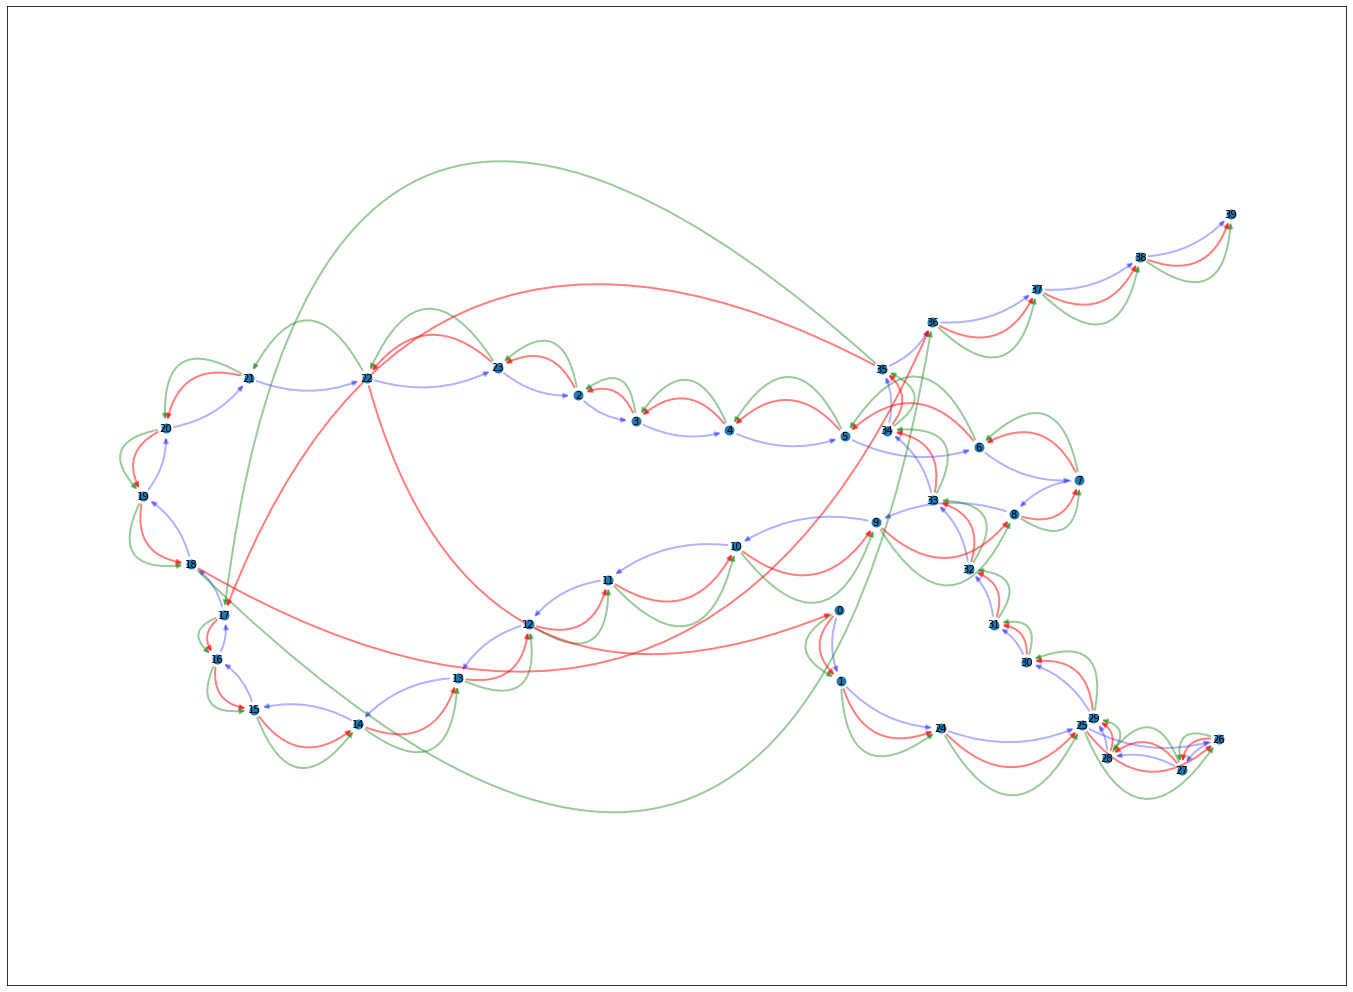

In [196]:
plot_multi_graph(tmp, figsize=(24,18))

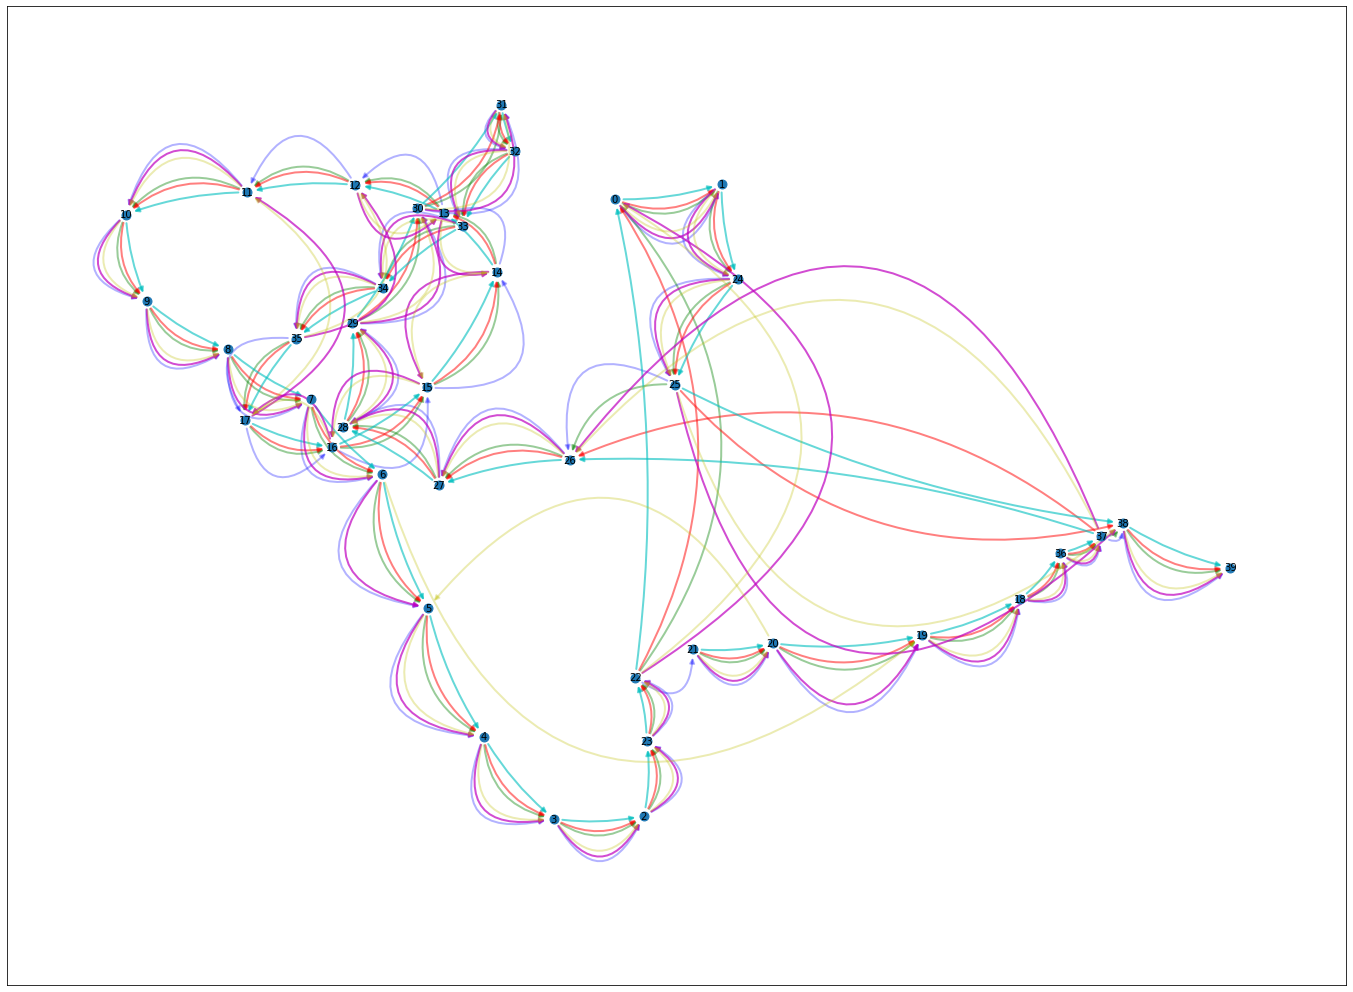

In [199]:
plot_multi_graph(gen_multi_graph(*test[2:8]), figsize=(24,18))

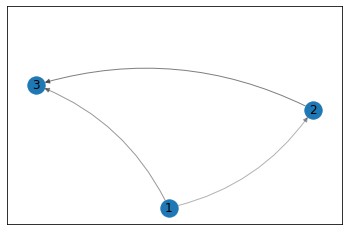

In [133]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
arcs = nx.draw_networkx_edges(G, pos=pos, connectionstyle='arc3,rad=0.2')
alphas = [0.3, 0.4, 0.5]
for i, arc in enumerate(arcs):  # change alpha values of arcs
    arc.set_alpha(alphas[i])